### 10주차 과제_60180874 김하경
## #1 워드클라우드 

In [23]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd

pre ="https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=130966&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page="

review = []
rate = []

for i in range(1,4500,20):
    url = pre+str(i)
    res = requests.get(url)
    soup = BeautifulSoup(res.content, 'html.parser')
    
    id_list = []
    id_pre = "_filtered_ment_"
    
    for i in range(10):
        id_list.append(id_pre+str(i))
    
    for id in id_list:
        review.append(soup.find('span',{'id':id}).get_text().strip())
       
    
    rate_list = []
    rate_list = (soup.select('div.star_score > em'))
    
    for r in rate_list:
        r = int(re.sub('<.+?>','',str(r)))
        rate.append(r)
        
df = pd.DataFrame({'review': review, 'rate': rate})

In [25]:
df.to_csv('review.csv')

In [41]:
!pip install konlpy

In [42]:
!pip install wordcloud

In [43]:
import numpy as np
import matplotlib.pyplot as pit

In [44]:
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud

In [45]:
df = pd.read_csv('review.csv')
len(df)

2250

In [46]:
df = df.dropna()
len(df)

2242

In [47]:
# 명사추출

In [48]:
okt = Okt()

In [49]:
word_list = []
word_list = df['review']

In [52]:
sentences_tag =[]
for sentence in word_list:
    morph = okt.pos(sentence)
    sentences_tag.append(morph)

In [53]:
sentences_tag

[[('좀비', 'Noun'),
  ('가', 'Josa'),
  ('무서운게', 'Adjective'),
  ('아니라', 'Adjective'),
  ('사람', 'Noun'),
  ('이', 'Josa'),
  ('무섭다는걸', 'Adjective'),
  ('알려주는', 'Verb'),
  ('영화', 'Noun')],
 [('그냥', 'Noun'),
  ('한국', 'Noun'),
  ('형', 'Suffix'),
  ('좀비', 'Noun'),
  ('물이', 'Noun'),
  ('어색하지', 'Adjective'),
  ('않았다는', 'Verb'),
  ('거', 'Noun'),
  ('에', 'Josa'),
  ('큰', 'Verb'),
  ('점수', 'Noun'),
  ('를', 'Josa'),
  ('주며', 'Verb'),
  ('앞', 'Noun'),
  ('으로의', 'Josa'),
  ('한국영', 'Noun'),
  ('화', 'Suffix'),
  ('를', 'Josa'),
  ('기대', 'Noun'),
  ('해봅니다', 'Verb'),
  ('.', 'Punctuation')],
 [('버스', 'Noun'),
  ('회사', 'Noun'),
  ('상무', 'Noun'),
  ('라는', 'Josa'),
  ('사람', 'Noun'),
  ('이', 'Josa'),
  ('진심', 'Noun'),
  ('역대', 'Noun'),
  ('급', 'Suffix'),
  ('민폐', 'Noun'),
  ('캐릭터', 'Noun'),
  ('인', 'Josa'),
  ('듯', 'Noun'),
  ('개', 'Suffix'),
  ('짜증나고', 'Adjective'),
  ('생존', 'Noun'),
  ('력', 'Suffix'),
  ('도', 'Josa'),
  ('좋음', 'Adjective')],
 [('생각', 'Noun'), ('보다', 'Josa'), ('너무', 'Adverb'), ('재밌었다', 'Adjec

In [55]:
# 명사만 추출
noun_list = []
for sentence in sentences_tag:
    for word, tag in sentence:
        if tag in ['Noun']:
            noun_list.append(word)

In [56]:
len(noun_list)

14662

In [60]:
# 두글자이상 단어만 추출
noun_list = [n for n in noun_list if len(n)>1]
noun_list[:200]

['좀비',
 '사람',
 '영화',
 '그냥',
 '한국',
 '좀비',
 '물이',
 '점수',
 '한국영',
 '기대',
 '버스',
 '회사',
 '상무',
 '사람',
 '진심',
 '역대',
 '민폐',
 '캐릭터',
 '생존',
 '생각',
 '영화',
 '비현실적',
 '공유',
 '얼굴',
 '공유',
 '얼굴',
 '부분',
 '마동석',
 '진짜',
 '사랑',
 '배급사',
 '스포일러',
 '법적대응',
 '한국',
 '영화',
 '심은경',
 '열연',
 '감동',
 '그냥',
 '스릴러',
 '다만',
 '초반',
 '좀비',
 '현재',
 '전국',
 '상황',
 '거의',
 '마지막',
 '뜬금',
 '회상씬',
 '부산',
 '그냥',
 '다른',
 '지역',
 '상황',
 '전형',
 '한국',
 '신파극',
 '발암',
 '유발',
 '노잼',
 '진짜',
 '좀비',
 '리얼',
 '영화',
 '줄거리',
 '감동',
 '전개',
 '정말',
 '점도',
 '배우',
 '연기',
 '한숨',
 '정도',
 '안소희',
 '대체',
 '누가',
 '캐스팅',
 '한지',
 '상황',
 '시간',
 '감정',
 '팔이',
 '알바',
 '차라리',
 '월드',
 '다운',
 '역시',
 '우리',
 '마블리',
 '좀비',
 '박력',
 '장난',
 '스토리',
 '개연',
 '성도',
 '기대',
 '진심',
 '영화',
 '노잼',
 '진짜',
 '평점',
 '평점',
 '평균',
 '화가',
 '올해',
 '천만',
 '대작',
 '화소',
 '프로',
 '스토리',
 '둘째',
 '재미',
 '영화',
 '부산',
 '스토리',
 '안드로메다',
 '신파',
 '전개',
 '캐릭터',
 '생각',
 '평점',
 '드림',
 '최악',
 '노잼',
 '인생',
 '쓰레기',
 '영화',
 '아침',
 '드라마',
 '작가',
 '스토리',
 '긴장감',
 '하품',
 '영화',
 '신파극',
 '좀비',
 '광고',
 '

In [61]:
# 단어별 갯수 세기
counts = Counter(noun_list)
tags = counts.most_common(100)
tags

[('영화', 904),
 ('좀비', 676),
 ('한국', 205),
 ('연기', 187),
 ('공유', 183),
 ('마동석', 176),
 ('감동', 162),
 ('진짜', 158),
 ('생각', 153),
 ('정말', 140),
 ('사람', 130),
 ('스토리', 118),
 ('마지막', 105),
 ('재미', 101),
 ('그냥', 96),
 ('스릴', 86),
 ('부산', 85),
 ('시간', 80),
 ('배우', 73),
 ('기대', 70),
 ('처음', 69),
 ('부분', 68),
 ('최고', 65),
 ('보고', 62),
 ('우리나라', 61),
 ('장면', 61),
 ('한국영', 56),
 ('긴장감', 54),
 ('완전', 54),
 ('내용', 52),
 ('결말', 52),
 ('조금', 51),
 ('정도', 49),
 ('이상', 48),
 ('평점', 44),
 ('눈물', 44),
 ('나름', 43),
 ('상황', 41),
 ('소희', 41),
 ('연출', 41),
 ('중간', 41),
 ('월드', 38),
 ('대박', 38),
 ('별로', 38),
 ('느낌', 38),
 ('인간', 38),
 ('역시', 36),
 ('신파', 35),
 ('가족', 35),
 ('몰입', 35),
 ('전개', 33),
 ('꿀잼', 33),
 ('정유미', 32),
 ('내내', 30),
 ('아빠', 30),
 ('개인', 29),
 ('연기력', 29),
 ('여름', 28),
 ('개연', 27),
 ('뭔가', 27),
 ('억지', 27),
 ('긴장', 27),
 ('심장', 27),
 ('보기', 26),
 ('때문', 26),
 ('외국', 26),
 ('시작', 26),
 ('몰입도', 26),
 ('스포', 25),
 ('마블리', 24),
 ('추천', 24),
 ('감독', 24),
 ('마무리', 24),
 ('기도', 24),
 ('사랑', 22),

In [66]:
# 불필요한 단어 삭제
dic={('영화', 904),('진짜', 158),('정말', 140),('보고', 62),('한국영', 56),('조금', 51),('정도', 49),('이상', 48), ('내내', 30),('뭔가', 27),('보기', 26),('때문', 26),('재밋', 21),('약간', 20), ('계속', 18),('아주', 18),('가장', 17)}

In [68]:
for i,j in dic:
    tags.remove((i,j))

In [69]:
tags

[('좀비', 676),
 ('한국', 205),
 ('연기', 187),
 ('공유', 183),
 ('마동석', 176),
 ('감동', 162),
 ('생각', 153),
 ('사람', 130),
 ('스토리', 118),
 ('마지막', 105),
 ('재미', 101),
 ('그냥', 96),
 ('스릴', 86),
 ('부산', 85),
 ('시간', 80),
 ('배우', 73),
 ('기대', 70),
 ('처음', 69),
 ('부분', 68),
 ('최고', 65),
 ('우리나라', 61),
 ('장면', 61),
 ('긴장감', 54),
 ('완전', 54),
 ('내용', 52),
 ('결말', 52),
 ('평점', 44),
 ('눈물', 44),
 ('나름', 43),
 ('상황', 41),
 ('소희', 41),
 ('연출', 41),
 ('중간', 41),
 ('월드', 38),
 ('대박', 38),
 ('별로', 38),
 ('느낌', 38),
 ('인간', 38),
 ('역시', 36),
 ('신파', 35),
 ('가족', 35),
 ('몰입', 35),
 ('전개', 33),
 ('꿀잼', 33),
 ('정유미', 32),
 ('아빠', 30),
 ('개인', 29),
 ('연기력', 29),
 ('여름', 28),
 ('개연', 27),
 ('억지', 27),
 ('긴장', 27),
 ('심장', 27),
 ('외국', 26),
 ('시작', 26),
 ('몰입도', 26),
 ('스포', 25),
 ('마블리', 24),
 ('추천', 24),
 ('감독', 24),
 ('마무리', 24),
 ('기도', 24),
 ('사랑', 22),
 ('안소희', 22),
 ('제일', 22),
 ('마음', 22),
 ('하나', 22),
 ('현실', 22),
 ('모습', 22),
 ('이기심', 22),
 ('우리', 21),
 ('사회', 21),
 ('감염', 20),
 ('천만', 19),
 ('한번', 19),
 

In [70]:
## 워드클라우드 생성

In [119]:
wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/NanumBarunGothic.ttf',
                     background_color='ivory',
                     colormap = 'Accent_r',
                     width=800, height=800)

print(dict(tags))

{'좀비': 676, '한국': 205, '연기': 187, '공유': 183, '마동석': 176, '감동': 162, '생각': 153, '사람': 130, '스토리': 118, '마지막': 105, '재미': 101, '그냥': 96, '스릴': 86, '부산': 85, '시간': 80, '배우': 73, '기대': 70, '처음': 69, '부분': 68, '최고': 65, '우리나라': 61, '장면': 61, '긴장감': 54, '완전': 54, '내용': 52, '결말': 52, '평점': 44, '눈물': 44, '나름': 43, '상황': 41, '소희': 41, '연출': 41, '중간': 41, '월드': 38, '대박': 38, '별로': 38, '느낌': 38, '인간': 38, '역시': 36, '신파': 35, '가족': 35, '몰입': 35, '전개': 33, '꿀잼': 33, '정유미': 32, '아빠': 30, '개인': 29, '연기력': 29, '여름': 28, '개연': 27, '억지': 27, '긴장': 27, '심장': 27, '외국': 26, '시작': 26, '몰입도': 26, '스포': 25, '마블리': 24, '추천': 24, '감독': 24, '마무리': 24, '기도': 24, '사랑': 22, '안소희': 22, '제일': 22, '마음': 22, '하나': 22, '현실': 22, '모습': 22, '이기심': 22, '우리': 21, '사회': 21, '감염': 20, '천만': 19, '한번': 19, '후회': 19, '대한': 19, '진심': 18, '노잼': 18, '발연기': 18, '바이러스': 18, '아이': 18, '실감': 17}


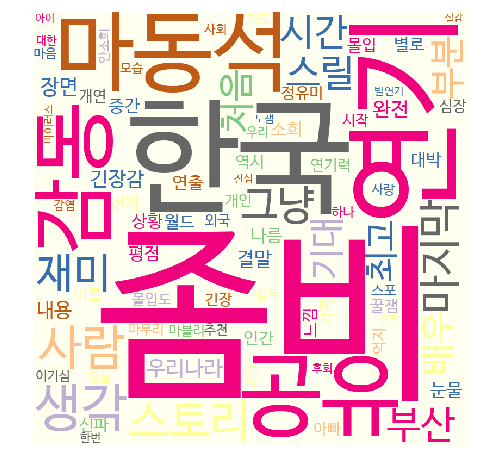

In [121]:
cloud = wordcloud.generate_from_frequencies(dict(tags))
pit.figure(figsize=(10,8))
pit.axis('off')
pit.imshow(cloud)
pit.show()

## #2 tf-idf값 구하기

In [1]:
import pandas as pd
from math import log
from konlpy.tag import Okt

In [2]:
df= pd.read_csv('review.csv')
len(df)

2250

In [3]:
df = df.dropna()
len(df)

2241

In [4]:
df = df.head(10)

In [5]:
docs=[]

In [6]:
for row in df['review']:
    docs.append(row)

In [7]:
docs

['좀비가 무서운게아니라 사람이무섭다는걸 알려주는영화',
 '그냥 한국형 좀비물이 어색하지 않았다는 거에 큰 점수를 주며 앞으로의 한국영화를 기대해봅니다.',
 '버스회사 상무라는 사람이 진심 역대급 민폐캐릭터인듯개짜증나고 생존력도 좋음',
 '생각보다 너무 재밌었다',
 '영화가 너무 비현실적이네요. 예를들어 공유 얼굴이라던가 공유 얼굴 같은 부분이...',
 '마동석 진짜 웃겨요 사랑해요',
 '배급사는 스포일러 법적대응 해야할듯',
 '한국에서 볼 수 없었던 영화',
 '심은경 열연 감동했어요.',
 '그냥 스릴러로 즐기기에 나쁘진 않다, 다만 초반에 어떻게 좀비가 생겼고 현재 전국상황이 어떤지 거의 나오지 않았고, 마지막에 뜬금없는 회상씬은 오그라들게 만들고, 부산에 가서 그냥 끝나버리고 다른 지역의 상황과 앞으...']

In [17]:
okt = Okt()

In [18]:
# 형태소 분리
sentences_tag = []
for sentence in docs:
    morph = okt.pos(sentence)
    sentences_tag.append(morph)

In [19]:
# 명사 추출
noun_list = []
for sentence in sentences_tag:
    for word, tag in sentence:
        if tag in ['Noun']:
            noun_list.append(word)

In [20]:
len(noun_list)

63

In [22]:
from collections import Counter
counts = Counter(noun_list)
tags = counts.most_common(10)
tags

[('좀비', 3),
 ('영화', 3),
 ('그냥', 3),
 ('사람', 2),
 ('한국', 2),
 ('앞', 2),
 ('공유', 2),
 ('얼굴', 2),
 ('상황', 2),
 ('물이', 1)]

In [23]:
vocab = ['좀비','영화','그냥','사람','한국','공유','얼굴','상황']

In [24]:
N = len(docs) #총 문서의 수

def tf(t,d):
    return d.count(t)

def idf(t):
    df = 0
    for doc in docs:
        df += t in doc
    return log(N/(df + 1))

def tfidf(t,d):
    return tf(t,d)* idf(t)

In [25]:
result = []
for i in range(N): # 각 문서에 대해서 아래 명령을 수행
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]
        result[-1].append(tf(t,d))

tf_ = pd.DataFrame(result, columns = vocab)
tf_

,좀비,영화,그냥,사람,한국,공유,얼굴,상황
0,1,1,0,1,0,0,0,0
1,1,1,1,0,2,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,1,0,0,0,2,2,0
5,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0
8,0,0,0,0,0,0,0,0
9,1,0,2,0,0,0,0,2


In [26]:
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

idf_ = pd.DataFrame(result, index = vocab, columns = ["IDF"])
idf_

,IDF
좀비,0.916291
영화,0.693147
그냥,1.203973
사람,1.203973
한국,1.203973
공유,1.609438
얼굴,1.609438
상황,1.609438


In [27]:
result = []
for i in range(N):
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]
        
        result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

,좀비,영화,그냥,사람,한국,공유,얼굴,상황
0,0.916291,0.693147,0.000000,1.203973,0.000000,0.000000,0.000000,0.000000
1,0.916291,0.693147,1.203973,0.000000,2.407946,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,1.203973,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.693147,0.000000,0.000000,0.000000,3.218876,3.218876,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.693147,0.000000,0.000000,1.203973,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.916291,0.000000,2.407946,0.000000,0.000000,0.000000,0.000000,3.218876
